<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Happy_and__Sad_face_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


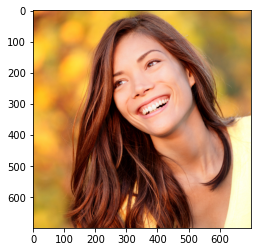

In [ ]:
img = image.load_img("/content/drive/MyDrive/Happy and Sad face identification/Datasets/train/happy/3.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Happy and Sad face identification/Datasets/train/happy/3.jpg")

array([[[ 34, 150, 239],
        [ 34, 150, 239],
        [ 38, 152, 243],
        ...,
        [ 62, 149, 216],
        [ 60, 145, 213],
        [ 60, 143, 211]],

       [[ 33, 147, 237],
        [ 33, 147, 237],
        [ 36, 150, 241],
        ...,
        [ 61, 146, 214],
        [ 61, 144, 212],
        [ 63, 144, 211]],

       [[ 32, 144, 234],
        [ 32, 144, 234],
        [ 35, 147, 237],
        ...,
        [ 62, 146, 212],
        [ 61, 142, 209],
        [ 62, 141, 208]],

       ...,

       [[ 51, 170, 225],
        [ 52, 171, 226],
        [ 52, 171, 226],
        ...,
        [194, 253, 255],
        [194, 253, 255],
        [193, 252, 254]],

       [[ 53, 171, 223],
        [ 54, 172, 224],
        [ 52, 172, 224],
        ...,
        [194, 253, 255],
        [194, 253, 255],
        [193, 252, 254]],

       [[ 54, 172, 224],
        [ 54, 172, 224],
        [ 54, 172, 224],
        ...,
        [194, 253, 255],
        [194, 253, 255],
        [194, 253, 255]]

In [ ]:
cv2.imread("/content/drive/MyDrive/Happy and Sad face identification/Datasets/train/happy/3.jpg").shape

(700, 700, 3)

In [ ]:
train =ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Happy and Sad face identification/Datasets/train',
                                       target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Happy and Sad face identification/Datasets/validation',
                                       target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')


Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape =(200,200,3)),
                                  
                                tf.keras.layers.MaxPool2D(2,2),
                                #

                                tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                #
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                #
                                tf.keras.layers.Flatten(),
                                ##
                                tf.keras.layers.Dense(512,activation='relu'),
                                #
                                tf.keras.layers.Dense(1,activation='sigmoid')
                                                         
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer =  RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
)

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 8s 3s/step - loss: 2.3614 - accuracy: 0.4444 - val_loss: 0.6181 - val_accuracy: 0.8889
Epoch 2/30
3/3 [==============================] - 1s 390ms/step - loss: 0.8829 - accuracy: 0.7778 - val_loss: 0.5695 - val_accuracy: 0.7778
Epoch 3/30
3/3 [==============================] - 1s 436ms/step - loss: 0.9167 - accuracy: 0.4444 - val_loss: 0.5624 - val_accuracy: 0.8889
Epoch 4/30
3/3 [==============================] - 1s 372ms/step - loss: 0.6611 - accuracy: 0.7778 - val_loss: 0.6274 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 384ms/step - loss: 0.5219 - accuracy: 0.6667 - val_loss: 0.4892 - val_accuracy: 0.6111
Epoch 6/30
3/3 [==============================] - 1s 399ms/step - loss: 0.7082 - accuracy: 0.4444 - val_loss: 0.3885 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 378ms/step - loss: 0.3777 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.8889
Epoch 8/30
3/3 [=======

In [ ]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

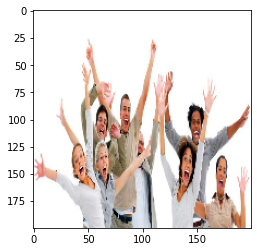

Happy Face


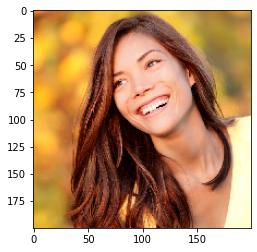

Happy Face


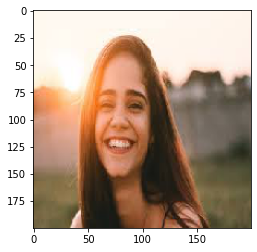

Happy Face


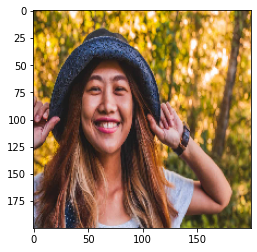

Happy Face


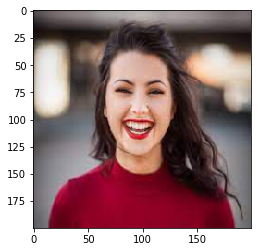

Happy Face


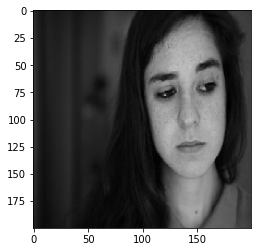

Sad face


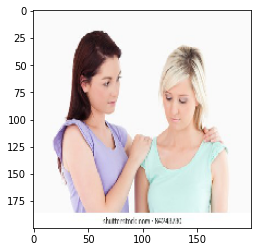

Sad face


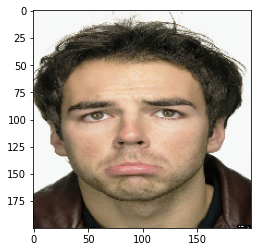

Sad face


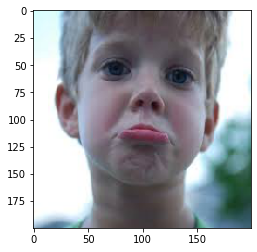

Sad face


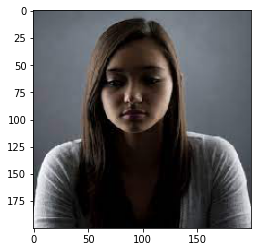

Sad face


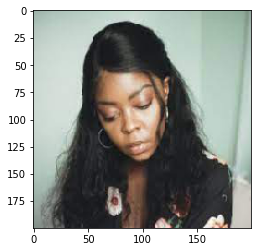

Sad face


In [ ]:
dir_path = '/content/drive/MyDrive/Happy and Sad face identification/Datasets/test'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val=model.predict(images)
  if val ==0:
    print("Happy Face")
  else:
    print("Sad face")
